In [130]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [131]:
def read_cities_from_file(filename):
    cities = []
    with open(filename, "r") as file:
        for line in file:
            x, y = map(lambda s: int(float(s)), line.strip().split())
            cities.append((x, y))
    return cities

In [132]:
cities = read_cities_from_file("berlin52.tsp")

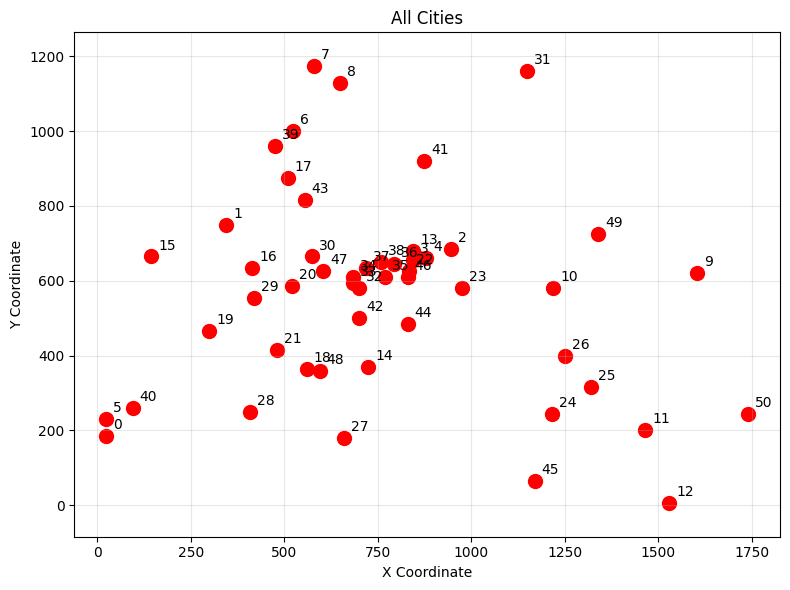

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter([c[0] for c in cities], [c[1] for c in cities], c="red", s=100)
for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10)
plt.title("All Cities")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [134]:
def get_distance_matrix(cities):
    n = len(cities)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i][j] = np.sqrt(
                (cities[i][0] - cities[j][0]) ** 2 + (cities[i][1] - cities[j][1]) ** 2
            )
    return dist_matrix

In [135]:
def calculate_total_distance(path, dist_matrix):
    total_dist = 0
    n = len(path)
    for i in range(n):
        total_dist += dist_matrix[path[i]][path[(i + 1) % n]]
        
    return total_dist

In [136]:
def generate_neighbor_2opt(path, i, j):
    if i > j:
        i, j = j, i

    new_path = path[:i] + path[i : j + 1][::-1] + path[j + 1 :]
    return new_path

In [137]:
def tabu_search(cities, max_iterations=500, tabu_tenure=15, n_neighbors=100):
    n_cities = len(cities)
    dist_matrix = get_distance_matrix(cities)

    current_solution = list(range(n_cities))
    random.shuffle(current_solution)

    best_solution = list(current_solution)

    current_cost = calculate_total_distance(current_solution, dist_matrix)
    best_cost = current_cost

    tabu_list = {}

    cost_history = [current_cost]

    print(f"Initial Cost: {current_cost:.2f}")

    for it in range(max_iterations):
        best_neighbor_path = None
        best_neighbor_cost = float("inf")
        best_move = None

        candidates_checked = 0

        while candidates_checked < n_neighbors:
            i, j = random.sample(range(n_cities), 2)

            neighbor_path = generate_neighbor_2opt(current_solution, i, j)
            neighbor_cost = calculate_total_distance(neighbor_path, dist_matrix)

            move_key = tuple(sorted((i, j)))

            is_tabu = (move_key in tabu_list) and (tabu_list[move_key] > it)

            if (not is_tabu) or (neighbor_cost < best_cost):
                if neighbor_cost < best_neighbor_cost:
                    best_neighbor_cost = neighbor_cost
                    best_neighbor_path = neighbor_path
                    best_move = move_key

            candidates_checked += 1

        if best_neighbor_path is not None:
            current_solution = best_neighbor_path
            current_cost = best_neighbor_cost

            tabu_list[best_move] = it + tabu_tenure

            if current_cost < best_cost:
                best_cost = current_cost
                best_solution = list(current_solution)

        cost_history.append(current_cost)

        if (it + 1) % 100 == 0:
            print(f"Iteration {it + 1}/{max_iterations} Best Cost: {best_cost:.2f}")

    return best_solution, best_cost, cost_history

**max_iterations** -> Numărul maxim de iterații pe care algoritmul le va executa pentru a căuta o soluție optimă.

**tabu_tenure** -> Durata (în iterații) pentru care o mutare rămâne în lista tabu, împiedicând reutilizarea ei imediată.

**n_neighbors** -> Numărul de vecini (soluții candidate) verificați în fiecare iterație pentru a selecta cea mai bună mutare.

In [138]:
final_path, final_cost, history = tabu_search(
    cities, 
    max_iterations=10000, 
    tabu_tenure=2, 
    n_neighbors=5 
)

Initial Cost: 30060.66
Iteration 100/10000 Best Cost: 14602.44
Iteration 200/10000 Best Cost: 14279.64
Iteration 300/10000 Best Cost: 12717.54
Iteration 400/10000 Best Cost: 12717.54
Iteration 500/10000 Best Cost: 12717.54
Iteration 600/10000 Best Cost: 12717.54
Iteration 700/10000 Best Cost: 12717.54
Iteration 800/10000 Best Cost: 12717.54
Iteration 900/10000 Best Cost: 12717.54
Iteration 1000/10000 Best Cost: 12717.54
Iteration 1100/10000 Best Cost: 12717.54
Iteration 1200/10000 Best Cost: 12717.54
Iteration 1300/10000 Best Cost: 12717.54
Iteration 1400/10000 Best Cost: 12717.54
Iteration 1500/10000 Best Cost: 12717.54
Iteration 1600/10000 Best Cost: 12717.54
Iteration 1700/10000 Best Cost: 12717.54
Iteration 1800/10000 Best Cost: 12717.54
Iteration 1900/10000 Best Cost: 12717.54
Iteration 2000/10000 Best Cost: 12717.54
Iteration 2100/10000 Best Cost: 12717.54
Iteration 2200/10000 Best Cost: 12717.54
Iteration 2300/10000 Best Cost: 12717.54
Iteration 2400/10000 Best Cost: 12717.54
It

In [139]:
print(f"Final Optimized Cost: {final_cost:.2f}")

Final Optimized Cost: 12061.34


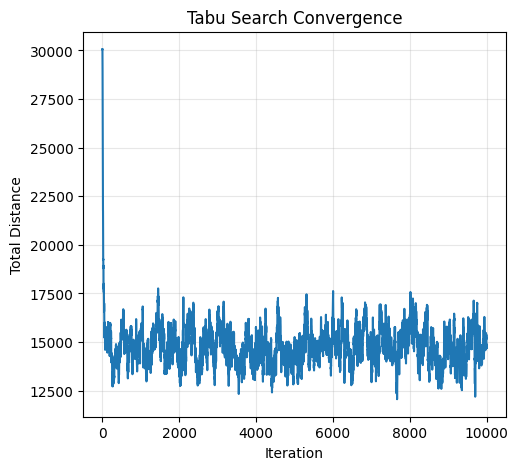

In [140]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history)
plt.title("Tabu Search Convergence")
plt.xlabel("Iteration")
plt.ylabel("Total Distance")
plt.grid(True, alpha=0.3)

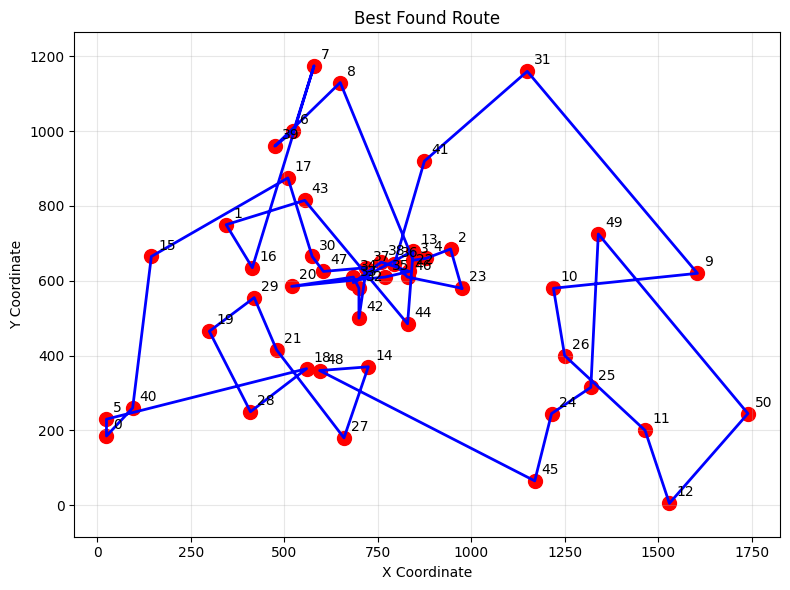

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter([c[0] for c in cities], [c[1] for c in cities], c="red", s=100)
path_coords = [cities[i] for i in final_path] + [cities[final_path[0]]]
plt.plot([p[0] for p in path_coords], [p[1] for p in path_coords], 'b-', linewidth=2)
for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10)
plt.title("Best Found Route")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.tight_layout()
plt.show()